# **CBM414 Procesamiento digital de señales Biomédicas, Laboratorio 03**
## Profesor: David Ortiz
=========================================

Basado en los laboratorios de los profesores Alejandro Veloz y Carolina Saavedra

### Resumen de actividades:
Este laboratorio tiene como objetivo abordar los conceptos de ruido y cuantización, los cuales son de gran importancia en el procesamiento de señales.

### Puntos a Tratar

- **Ruido:** Abordar la definición de ruido, ver sus tipos, y estudiar la relación señal ruido o SNR (Signal to noise ratio)
- **Cuantización:** Aplicar conceptos básicos vistos en la clase de cuantización (Clase 06)


### Objetivos de Aprendizaje

- Reforzar los aspectos teóricos de la clase, en forma práctica utilizando Python.

## **NOTA IMPORTANTE:**
Para el desarrollo de este laboratorio, necesitaresmo tres archivos con los que trabajaremos: `piano.wav`, `reposo.txt` y `sueno.txt`. Para poder acceder estos archivos en _google colab_, deben cargarlos en la carpeta _archivos_ ubicada en el lateral izquierdo (debajo del ícono de la llave).

## Ruido en una señal:
Todo aquello en un conjunto de datos, señal, imagen o información general que:

- No es de interés (se decide que "no es de interés" o es irrelevante)
- Degrada o distorsiona la señal (datos, etc.) de interés, la contamina
- impide o limita el estudio o uso de tal información (estorba).

Fuente: https://www.youtube.com/watch?v=r8JliSuo2bA&list=PLZIVgAvnbIEDqt5juwc6iUZvH2_wWCeGj&index=3&ab_channel=MundoTecnol%C3%B3gico


### Colores del ruido:
Ver https://en.wikipedia.org/wiki/Colors_of_noise

### Cuantificación del ruido:
El SNR (relación señal-ruido, por sus siglas en inglés) es una medida que compara el nivel de una señal útil con el nivel del ruido de fondo. Se expresa en decibelios (dB) y una SNR más alta indica que la señal es mucho más fuerte que el ruido, lo que significa mejor calidad en la recepción o procesamiento de la señal. Es clave para evaluar la claridad de una señal en sistemas de comunicación y procesamiento de señales.

\begin{equation*}
SNR_{dB}=10\log_{10}\left(\frac{E[S^2]}{E[N^2]}\right)
\end{equation*}
donde $E[S^2]$ y $E[N^2]$ es la varianza de la señal y del ruido, respectivamente.


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read # para leer archivos de audio
from IPython.display import Audio # para escuchar archivos de audio
import scipy.signal as signal
from scipy.fft import fft, ifft, fftfreq

## Procesamiento de una señal de audio (piano)

La cuantificación es el proceso de mapear valores de amplitud continua en un conjunto de valores contables. Puede ser aplicado a señales análogas o a señales en tiempo discreto.

Cargue, grafique, normalice la amplitud entre -1 y 1 y escuche la señal de audio entregada en el laboratorio.

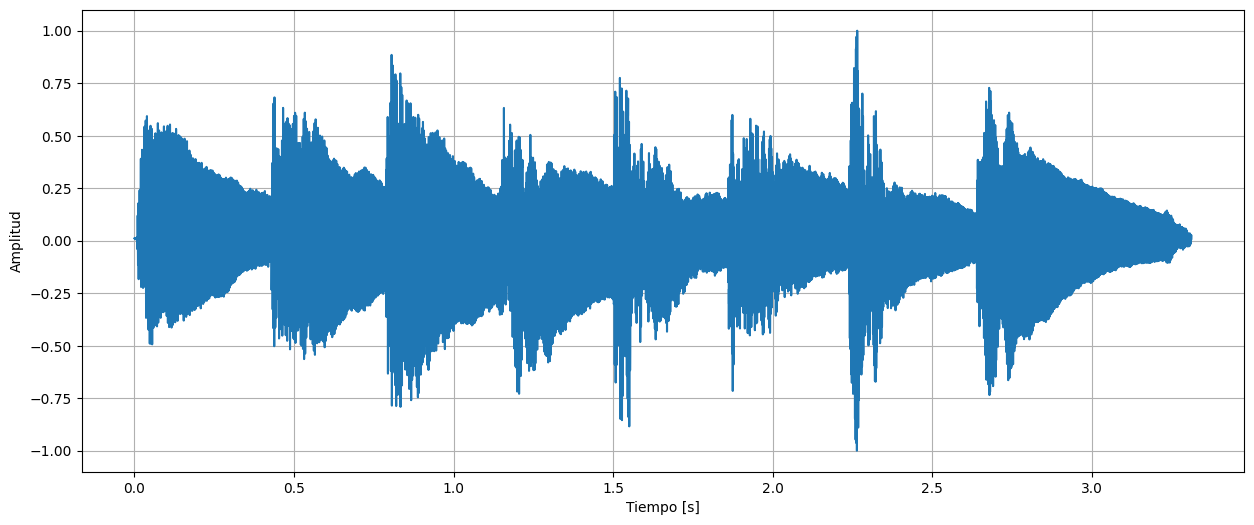

In [3]:
fs, x =read("./piano.wav") # carga señal de audio
x = x.astype(np.float32)
x_norm = 2 * (x - np.min(x)) / (np.max(x) - np.min(x)) - 1

t=np.arange(len(x))/fs
plt.figure(figsize=(15,6))
plt.plot(t,x_norm)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

Audio(x_norm,rate=fs)

- ¿Cuál es su número de muestras?
- ¿Cuál es su frecuencia de muestreo (Fs)?
- ¿Cuál es su longitud en tiempo (s)?
- ¿En cuantos bits está cuantizada?
- Escuche el audio con el doble de la frecuencia de muestreo de la señal original. ¿Qué diferencia nota?
- Realice el mismo procedimiento, pero esta vez con una frecuencia la mitad de la original. Ahora, ¿qué pasa con el audio?

In [4]:
print("El número de muestras es: ", len(x))
print("La frecuencia de muestreo es: ", fs)
print("La longitud en tiempo es: ", len(x)/fs, "segundos")
print('La señal está cuantizada en 16 bits')
range_s=np.max(np.abs(x))
bits=np.ceil(np.log2(range_s))+1

print("Número de bits de cuantificación: ", int(bits))
Audio(x,rate=fs*2)
Audio(x,rate=fs/2)

El número de muestras es:  36515
La frecuencia de muestreo es:  11025
La longitud en tiempo es:  3.312018140589569 segundos
La señal está cuantizada en 16 bits
Número de bits de cuantificación:  16


In [5]:
# Reproducir audio al doble de la frecuencia de muestreo
Audio(x_norm, rate=fs*2)


In [6]:
# Reproducir audio a la mitad de la frecuencia de muestreo
Audio(x_norm, rate=fs//2)


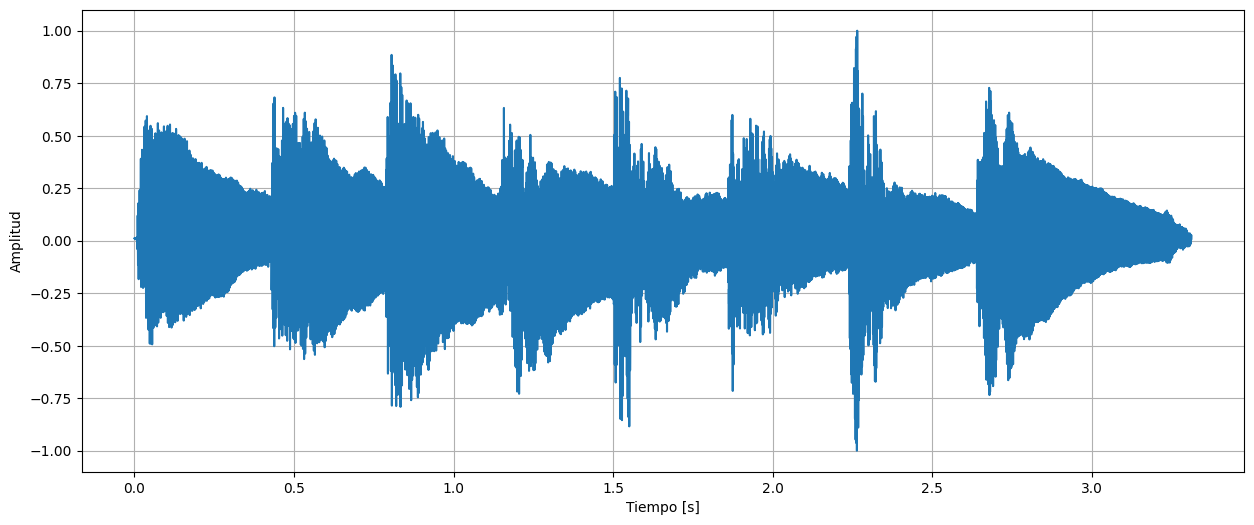

In [7]:
# Cargar la nueva señal de audio
fs_lab, x_lab = read("./piano.wav")
x_lab = x_lab.astype(np.float32)

# Normalizar la amplitud entre -1 y 1
x_lab_norm = 2 * (x_lab - np.min(x_lab)) / (np.max(x_lab) - np.min(x_lab)) - 1

# Graficar la señal
t_lab = np.arange(len(x_lab)) / fs_lab
plt.figure(figsize=(15,6))
plt.plot(t_lab, x_lab_norm)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

# Reproducir el audio
Audio(x_lab_norm, rate=fs_lab)


### Punto 1 (2.5)
Considere la siguiente función

In [8]:
def cuantizar(s,bit):
    # s: senal de entrada
    # bit: bits de cuantificación
    Plus1=np.power(2, (bit-1))
    X=s*Plus1
    X=np.round(X)
    X=np.minimum(Plus1-1.0,X)
    X=np.maximum(-1.0*Plus1,X)
    X=X/Plus1
    return X

def rms(x, xq):
    return np.sqrt(np.mean((x-xq)**2))

* (0.5 puntos)  Explique detalladamente ¿qué realiza la función `cuantizar`?
* (0.5 puntos) Re-cuantice la señal de audio a 2, 4 y 8 bits. Escuche las señales y describa qué percibe
* (0.5 puntos) Grafique la señal original y la cuantizada, para 2, 4 y 8 bits (son 3 gráficos) ¿Qué observa en los gráficos?
* (0.5 puntos) Calcule el error (rms) de cuantización para  2, 4 y 8 bits. ¿Qué puede concluir de los resultados?
* (0.5 puntos) Grafique la diferencia (punto a punto) entre la señal original y la señal re-cuantizada para  2, 4 y 8 bits (realice un solo gráfico). ¿Qué puede concluir del gráfico anterior?


```python

    Plus1 = np.power(2, (bit - 1))
```
- **Explicación:** Calcula \( 2^{(bit - 1)} \), que determina el número de niveles de cuantización positivos disponibles. Por ejemplo, si `bit = 4`, entonces `Plus1 = 8`.

```python
    X = s * Plus1
```
- **Explicación:** Escala la señal de entrada `s` multiplicándola por `Plus1` para ajustarla al rango de los niveles de cuantización.

```python
    X = np.round(X)
```
- **Explicación:** Redondea los valores de `X` al entero más cercano, asignando cada muestra al nivel de cuantización más cercano.

```python
    X = np.minimum(Plus1 - 1.0, X)
    X = np.maximum(-1.0 * Plus1, X)
```
- **Explicación:** Limita los valores de `X` para que no excedan los niveles máximos y mínimos permitidos por el número de bits. Asegura que `X` esté dentro del rango \([-2^{(bit - 1)}, 2^{(bit - 1)} - 1]\).

```python
    X = X / Plus1
    return X
```
- **Explicación:** Normaliza la señal cuantizada dividiendo por `Plus1`, devolviendo la señal cuantizada al rango original de amplitud.

**Resumen:** La función `cuantizar` escala la señal de entrada, redondea los valores para asignarlos a niveles discretos de cuantización, limita los valores para evitar saturación y normaliza la señal cuantizada. Esto resulta en una versión cuantizada de la señal original utilizando el número especificado de bits.

In [9]:
# Re-cuantización de la señal a 2, 4 y 8 bits
xq_2bit = cuantizar(x_norm, 2)
xq_4bit = cuantizar(x_norm, 4)
xq_8bit = cuantizar(x_norm, 8)


In [10]:
# Escuchar la señal cuantizada a 2 bits
print("Audio cuantizado a 2 bits:")
Audio(xq_2bit, rate=fs)


Audio cuantizado a 2 bits:


In [11]:
# Escuchar la señal cuantizada a 4 bits
print("Audio cuantizado a 4 bits:")
Audio(xq_4bit, rate=fs)


Audio cuantizado a 4 bits:


In [12]:
# Escuchar la señal cuantizada a 8 bits
print("Audio cuantizado a 8 bits:")
Audio(xq_8bit, rate=fs)


Audio cuantizado a 8 bits:


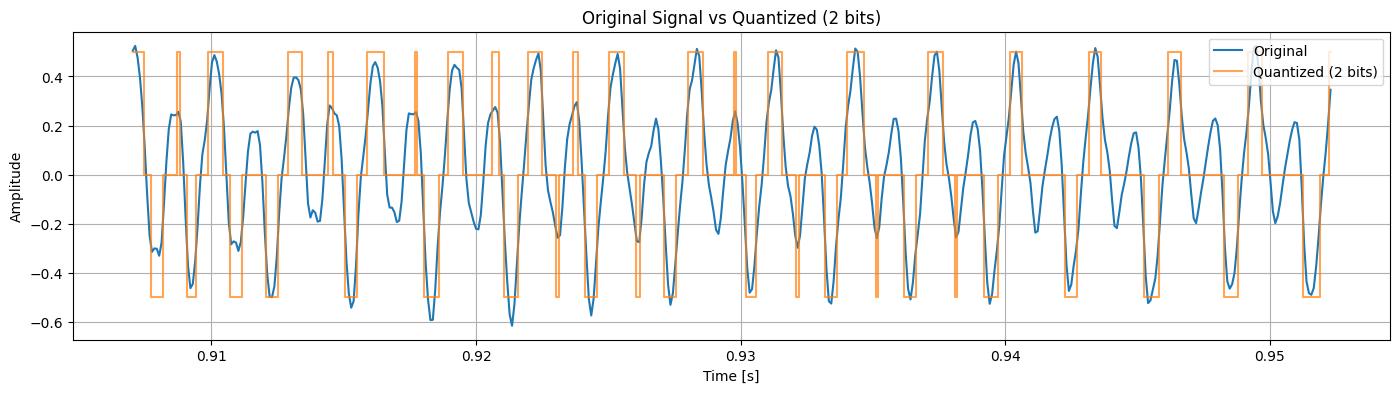

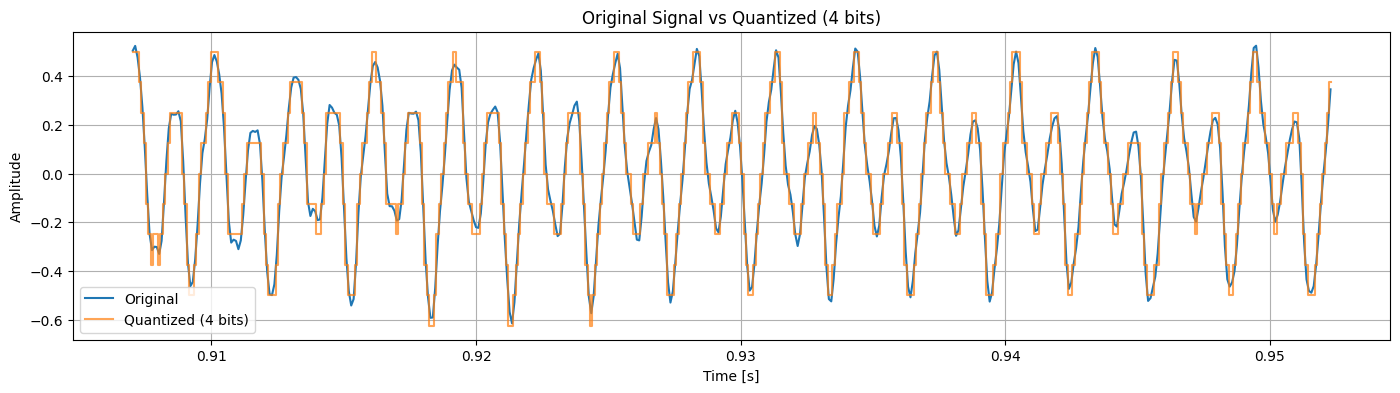

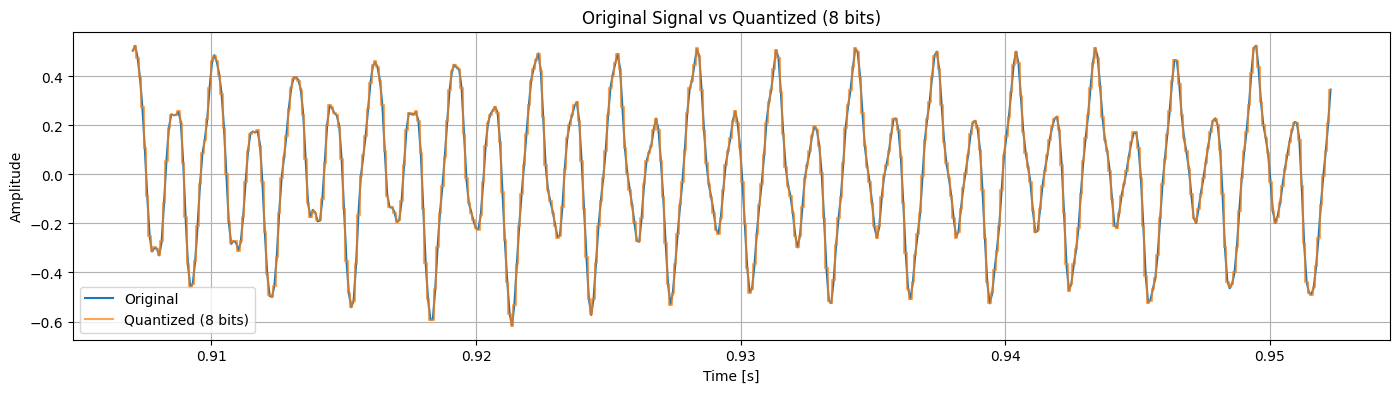

In [13]:
# Define a segment of the signal to visualize
start_sample = 10000
end_sample = 10500

# Plot for 2 bits
plt.figure(figsize=(17, 4))
plt.plot(t[start_sample:end_sample], x_norm[start_sample:end_sample], label='Original')
plt.step(t[start_sample:end_sample], xq_2bit[start_sample:end_sample], label='Quantized (2 bits)', where='mid', alpha=0.7)
plt.title('Original Signal vs Quantized (2 bits)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Plot for 4 bits
plt.figure(figsize=(17, 4))
plt.plot(t[start_sample:end_sample], x_norm[start_sample:end_sample], label='Original')
plt.step(t[start_sample:end_sample], xq_4bit[start_sample:end_sample], label='Quantized (4 bits)', where='mid', alpha=0.7)
plt.title('Original Signal vs Quantized (4 bits)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Plot for 8 bits
plt.figure(figsize=(17, 4))
plt.plot(t[start_sample:end_sample], x_norm[start_sample:end_sample], label='Original')
plt.step(t[start_sample:end_sample], xq_8bit[start_sample:end_sample], label='Quantized (8 bits)', where='mid', alpha=0.7)
plt.title('Original Signal vs Quantized (8 bits)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


In [14]:
# Cálculo del error RMS
error_2bit = rms(x_norm, xq_2bit)
error_4bit = rms(x_norm, xq_4bit)
error_8bit = rms(x_norm, xq_8bit)

print(f"Error RMS para 2 bits: {error_2bit}")
print(f"Error RMS para 4 bits: {error_4bit}")
print(f"Error RMS para 8 bits: {error_8bit}")


Error RMS para 2 bits: 0.14119908213615417
Error RMS para 4 bits: 0.03587143123149872
Error RMS para 8 bits: 0.002257737098261714


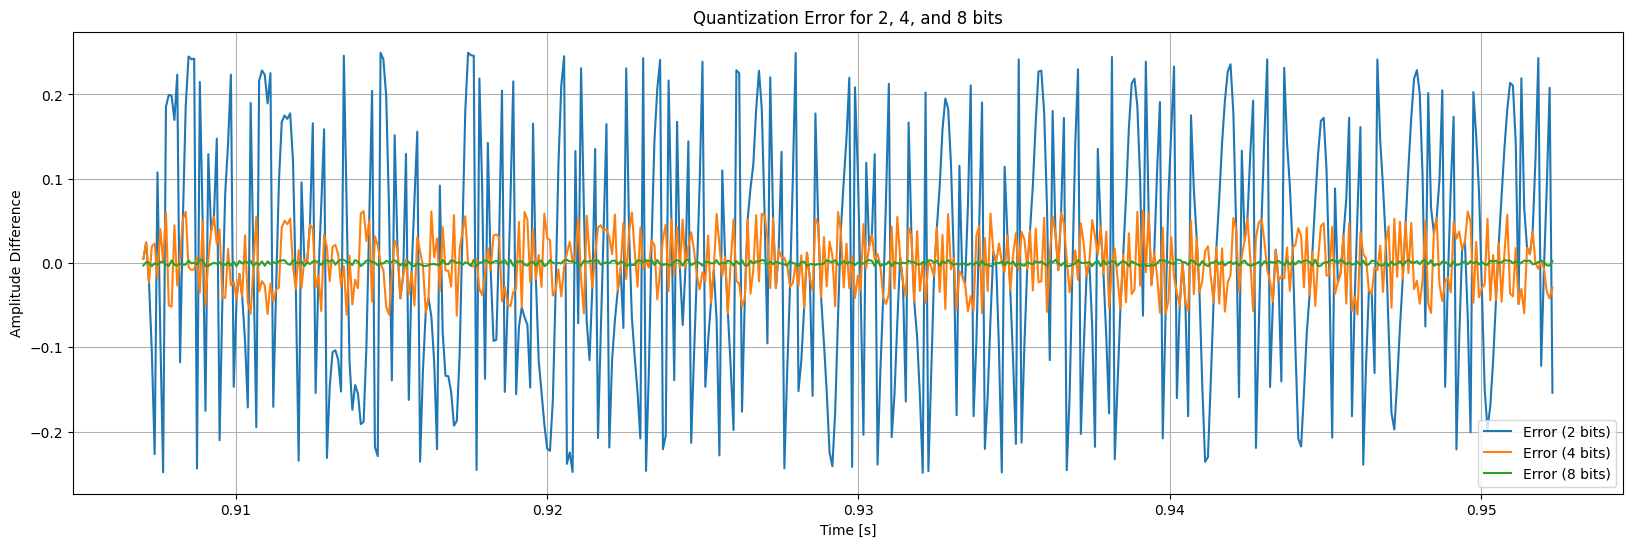

In [15]:
# Calculation of differences
diff_2bit = x_norm - xq_2bit
diff_4bit = x_norm - xq_4bit
diff_8bit = x_norm - xq_8bit

# Plotting the quantization errors
plt.figure(figsize=(20, 6))
plt.plot(t[start_sample:end_sample], diff_2bit[start_sample:end_sample], label='Error (2 bits)')
plt.plot(t[start_sample:end_sample], diff_4bit[start_sample:end_sample], label='Error (4 bits)')
plt.plot(t[start_sample:end_sample], diff_8bit[start_sample:end_sample], label='Error (8 bits)')
plt.title('Quantization Error for 2, 4, and 8 bits')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude Difference')
plt.legend()
plt.grid()
plt.show()


### Punto 2 (2.5 Puntos)
Recordemos que el $SNR_{dB}$ se puede calcular como
\begin{equation*}
SNR_{dB}=10\log_{10}\left(\frac{E[S^2]}{E[N^2]}\right)
\end{equation*}
donde $E[S^2]$ y $E[N^2]$ es la varianza de la señal y del ruido, respectivamente.

Ahora, considere las siguientes funciones `add_gaussian_noise` y `calculate_snr`



In [16]:
def add_gaussian_noise(signal, snr_db):

    # Calcular la potencia de la señal
    signal_power = np.mean(signal**2)

    # Calcular la potencia del ruido deseada
    snr_linear = 10**(snr_db / 10)
    noise_power = signal_power / snr_linear

    # Calcular la varianza del ruido
    noise_variance = noise_power

    # Generar ruido gaussiano
    noise = np.sqrt(noise_variance) * np.random.randn(*signal.shape)

    # Agregar el ruido a la señal
    noisy_signal = signal + noise

    return noisy_signal, noise

def calculate_snr(signal, noise):
    """ Calcula el SNR entre una señal de entrada "signal" y el ruido "noise"
    """
    # Ensure numpy arrays
    signal, noise = np.array(signal), np.array(noise)

    # Calculate the power of the signal and the noise
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)

    # Calculate the SNR in decibels (dB)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

* (0.7 puntos) Explique brevemente ¿qué realiza la función `add_gaussian_noise`?. Utilice la definición de $SNR_{dB}$ para explicar, paso a paso matemáticamente, como se extrajo la variable `noise_variance` ubicada dentro de la función.
* (0.6 puntos) Contamine la señal de audio a con un ruido Gaussiano utilizando la función `noise = np.random.normal(0, var, len(signal))`, donde Var = 0.1, 0.01, 0.001. Escuche las señales y describa brevemente qué percibe.
* (0.6 puntos) Calcule el $SNR_{dB}$ utilizando la función `calculate_snr` y reporte los valores para las 3 varianzas dadas. ¿El $SNR_{dB}$ aumenta, disminuye o se mantiene igual? ¿Qué puede concluir de los resultados, haciendo énfasis en el significado de decibel?
* (0.6 puntos) Utilize la función `add_gaussian_noise` y agregue ruido Gaussiano con un $SNR_{dB}$ = 1, 10, 30. Utilice la segunda salida de la función `add_gaussian_noise`, i.e., `noise` y calcule la varianza. ¿Qué puede concluir de los resultados?

**(a) Explanation of the `add_gaussian_noise` Function:**

The `add_gaussian_noise` function adds Gaussian (normal) noise to a signal to achieve a specified Signal-to-Noise Ratio (SNR) in decibels (dB). The goal is to adjust the noise variance such that the power ratio between the signal and noise matches the desired SNR.

**Mathematical Derivation of `noise_variance`:**

1. **Calculate Signal Power (\( E[S^2] \)):**
   \[
   \text{signal\_power} = E[S^2] = \text{mean}(S^2)
   \]
   This computes the average power of the signal.

2. **Convert SNR from dB to Linear Scale:**
   \[
   \text{snr\_linear} = 10^{(\text{snr\_db} / 10)}
   \]
   This step converts the SNR from decibels to a linear scale.

3. **Calculate Noise Power (\( E[N^2] \)):**
   \[
   \text{noise\_power} = \frac{\text{signal\_power}}{\text{snr\_linear}}
   \]
   Using the definition of SNR in linear terms:
   \[
   \text{SNR}_{\text{linear}} = \frac{E[S^2]}{E[N^2]}
   \]
   Solving for \( E[N^2] \) gives the required noise power.

4. **Determine Noise Variance:**
   \[
   \text{noise\_variance} = \text{noise\_power}
   \]
   For zero-mean Gaussian noise, the variance equals the power.

5. **Generate Gaussian Noise and Add to Signal:**
   \[
   \text{noise} = \sqrt{\text{noise\_variance}} \times \text{random\_gaussian\_samples}
   \]
   \[
   \text{noisy\_signal} = \text{signal} + \text{noise}
   \]
   The noise is added to the original signal to produce the noisy signal with the desired SNR.

---



In [17]:
# Varianzas a utilizar
variances = [0.1, 0.01, 0.001]

# Contaminación de la señal y escucha
for var in variances:
    # Generar ruido gaussiano
    noise = np.random.normal(0, np.sqrt(var), len(x_norm))
    
    # Señal contaminada
    noisy_signal = x_norm + noise
    
    # Escuchar la señal
    print(f"Señal con ruido gaussiano de varianza {var}:")
    display(Audio(noisy_signal, rate=fs))


Señal con ruido gaussiano de varianza 0.1:


Señal con ruido gaussiano de varianza 0.01:


Señal con ruido gaussiano de varianza 0.001:


In [18]:
# Lista para almacenar los SNR calculados
snr_values = []

# Potencia de la señal original
signal_power = np.mean(x_norm**2)

for var in variances:
    # Generar ruido gaussiano
    noise = np.random.normal(0, np.sqrt(var), len(x_norm))
    
    # Señal contaminada
    noisy_signal = x_norm + noise
    
    # Calcular el SNR
    snr = calculate_snr(x_norm, noise)
    snr_values.append(snr)
    
    print(f"SNR_dB para varianza {var}: {snr:.2f} dB")


SNR_dB para varianza 0.1: -3.09 dB
SNR_dB para varianza 0.01: 6.89 dB
SNR_dB para varianza 0.001: 16.90 dB


In [19]:
# Valores de SNR_dB a utilizar
snr_db_values = [1, 10, 30]

# Lista para almacenar las varianzas calculadas
noise_variances = []

for snr_db in snr_db_values:
    # Agregar ruido gaussiano con el SNR_dB especificado
    noisy_signal, noise = add_gaussian_noise(x_norm, snr_db)
    
    # Calcular la varianza del ruido
    noise_variance = np.var(noise)
    noise_variances.append(noise_variance)
    
    print(f"Para SNR_dB = {snr_db}:")
    print(f"Varianza del ruido = {noise_variance:.6f}\n")


Para SNR_dB = 1:
Varianza del ruido = 0.039749

Para SNR_dB = 10:
Varianza del ruido = 0.004928

Para SNR_dB = 30:
Varianza del ruido = 0.000050



## Procesamiento de una señal de ECG.

Considere la señal generada con el código de más abajo. Ésta contiene una señal de ECG contaminada con ruido aleatorio y ruido periódico proveniente de la red eléctrica de 50Hz.




C:\Users\Matzi\AppData\Local\Temp\ipykernel_21428\255189527.py:10: DeprecationWarning: Please import `daub` from the `scipy.signal` namespace; the `scipy.signal.wavelets` namespace is deprecated and will be removed in SciPy 2.0.0.
  pqrst = signal.wavelets.daub(10)
C:\Users\Matzi\AppData\Local\Temp\ipykernel_21428\255189527.py:10: DeprecationWarning: scipy.signal.daub is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  pqrst = signal.wavelets.daub(10)


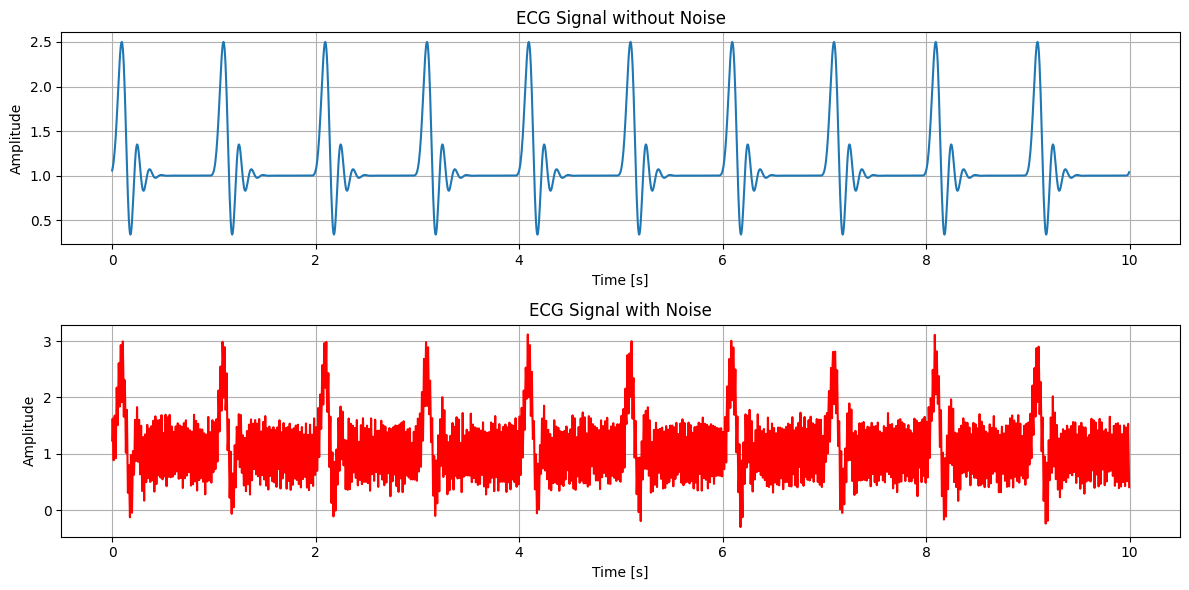

In [20]:
# Parameters
sampling_rate = 200  # Sampling frequency in Hz
capture_length = 10  # Signal duration in seconds

def create_ECG_signal():
    bpm = 60  # Beats per minute
    bps = bpm / 60  # Beats per second

    # Create a wave similar to a heartbeat
    pqrst = signal.wavelets.daub(10)
    samples_rest = 10
    zero_array = np.zeros(samples_rest, dtype=float)
    pqrst_full = np.concatenate([pqrst, zero_array])

    # Concatenate the beats to cover the entire duration
    ecg_template = np.tile(pqrst_full, int(capture_length * bps))

    # Resample the signal to match the desired sampling frequency
    ecg_sampled = signal.resample(ecg_template, int(sampling_rate * capture_length))
    ecg_sampled = ecg_sampled / np.max(np.abs(ecg_sampled))  # Normalize
    ecg_sampled = 1.5 * ecg_sampled + 1  # Adjust amplitude and DC level

    return ecg_sampled

# Generate the ECG signal without noise
ecg_sampled = create_ECG_signal()

# Time
time = np.arange(0, capture_length, 1 / sampling_rate)

# Generate random noise and 50 Hz noise
np.random.seed(0)  # For reproducibility
noise = np.random.normal(0, 0.1, len(ecg_sampled))
noise50hz = 0.5 * np.sin(2 * np.pi * 50 * time)

# ECG signal with noise
ecg_noisy_sampled = ecg_sampled + noise + noise50hz

# Plot the signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, ecg_sampled)
plt.title('ECG Signal without Noise')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, ecg_noisy_sampled, color='r')
plt.title('ECG Signal with Noise')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

In [21]:
# Calcular la potencia de la señal y del ruido
signal_power = np.mean(ecg_sampled ** 2)
noise_power = np.mean((noise + noise50hz) ** 2)

# Calcular el SNR en decibelios
SNR_dB = 10 * np.log10(signal_power / noise_power)
print(f"El SNR de la señal respecto al ruido es: {SNR_dB:.2f} dB")


El SNR de la señal respecto al ruido es: 10.11 dB


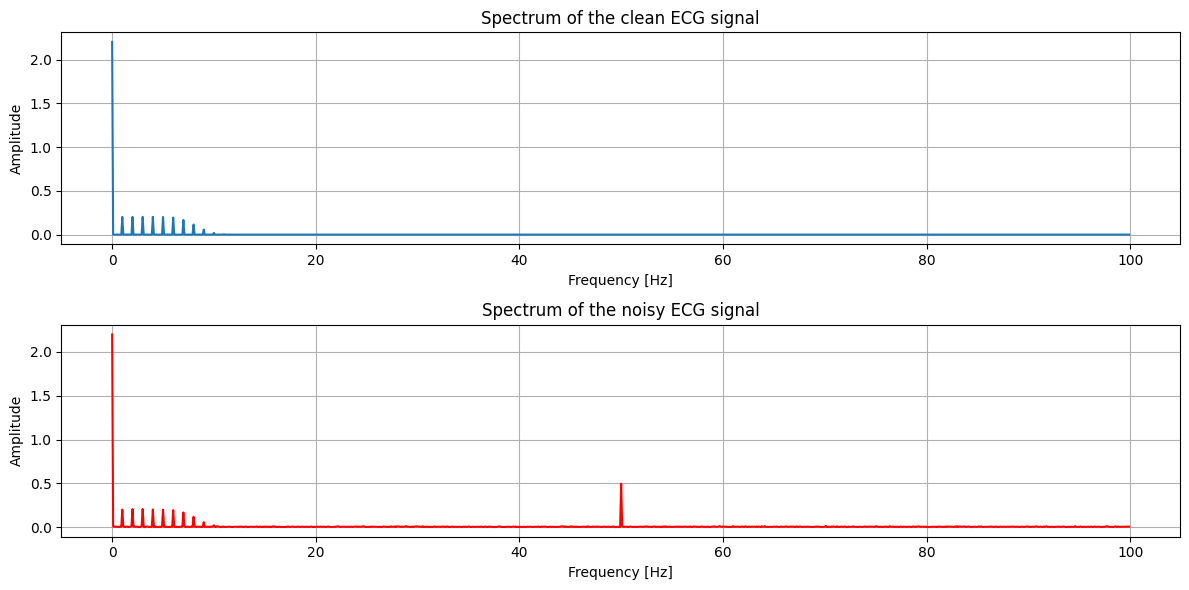

In [22]:
# FFT of the clean signal
yf_clean = fft(ecg_sampled)
xf = fftfreq(len(ecg_sampled), 1 / sampling_rate)

# FFT of the noisy signal
yf_noisy = fft(ecg_noisy_sampled)

# Plot the amplitude spectrum of the clean signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(xf[:len(xf)//2], 2.0 / len(ecg_sampled) * np.abs(yf_clean[:len(yf_clean)//2]))
plt.title('Spectrum of the clean ECG signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()

# Plot the amplitude spectrum of the noisy signal
plt.subplot(2, 1, 2)
plt.plot(xf[:len(xf)//2], 2.0 / len(ecg_noisy_sampled) * np.abs(yf_noisy[:len(yf_noisy)//2]), color='r')
plt.title('Spectrum of the noisy ECG signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


In [23]:
# Normalizar la señal de -1 a 1
ecg_normalized = 2 * (ecg_sampled - np.min(ecg_sampled)) / (np.max(ecg_sampled) - np.min(ecg_sampled)) - 1


In [24]:
def cuantizar(s, bit):
    # s: señal de entrada normalizada entre -1 y 1
    # bit: número de bits de cuantización
    niveles = 2 ** bit
    s_quantized = np.round(((s + 1) / 2) * (niveles - 1))  # Escalar y cuantizar
    s_quantized = s_quantized / (niveles - 1) * 2 - 1  # Escalar de vuelta a -1 y 1
    return s_quantized


In [25]:
# Cuantización
ecg_quantized_2bit = cuantizar(ecg_normalized, 2)
ecg_quantized_4bit = cuantizar(ecg_normalized, 4)
ecg_quantized_8bit = cuantizar(ecg_normalized, 8)


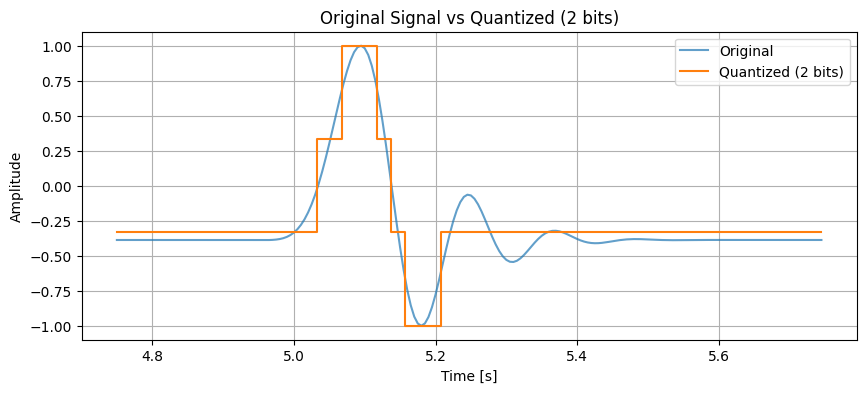

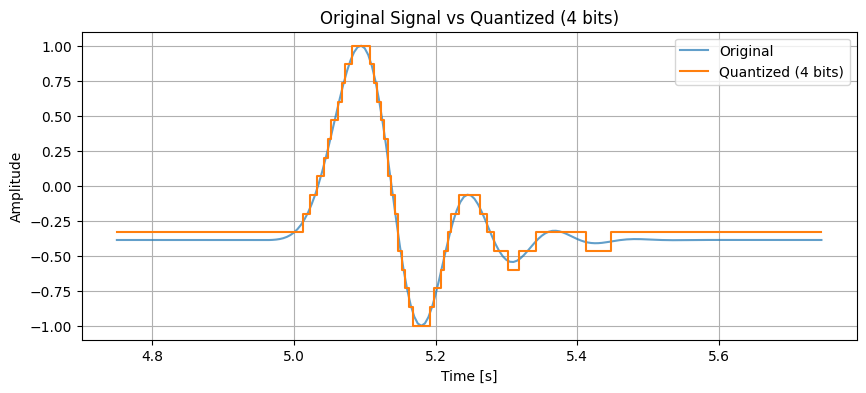

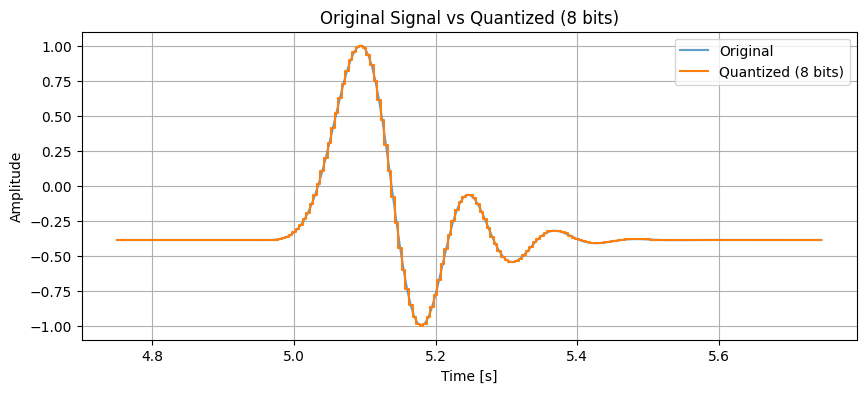

In [26]:
# Select a segment to plot
start_sample = 950
end_sample = 1150
time_segment = time[start_sample:end_sample]

# Plot for 2 bits
plt.figure(figsize=(10, 4))
plt.plot(time_segment, ecg_normalized[start_sample:end_sample], label='Original', alpha=0.7)
plt.step(time_segment, ecg_quantized_2bit[start_sample:end_sample], label='Quantized (2 bits)', where='mid')
plt.title('Original Signal vs Quantized (2 bits)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Plot for 4 bits
plt.figure(figsize=(10, 4))
plt.plot(time_segment, ecg_normalized[start_sample:end_sample], label='Original', alpha=0.7)
plt.step(time_segment, ecg_quantized_4bit[start_sample:end_sample], label='Quantized (4 bits)', where='mid')
plt.title('Original Signal vs Quantized (4 bits)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Plot for 8 bits
plt.figure(figsize=(10, 4))
plt.plot(time_segment, ecg_normalized[start_sample:end_sample], label='Original', alpha=0.7)
plt.step(time_segment, ecg_quantized_8bit[start_sample:end_sample], label='Quantized (8 bits)', where='mid')
plt.title('Original Signal vs Quantized (8 bits)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


## Punto 1 (2 Puntos)  

* (0.6 puntos) Grafique la señal sin ruido y con ruido. Además, calcule el $SNR_{dB}$ de las señal respecto al ruido que la contamina.
* (0.6 puntos) Utilize la `FFT` y obtenga el espectro de la señal sin ruido y con ruido. Analise ambos espectros y describa ¿Qué puede concluir de las gráficas?
* (0.8 puntos) Normalice la señal de -1 a 1. Grafique la señal original y la cuantizada, para 2, 4 y 8 bits (son 3 gráficos) ¿Qué observa en los gráficos?
